Import Libraries

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.applications import (
    InceptionResNetV2, NASNetMobile, NASNetLarge, Xception, DenseNet121, DenseNet169, DenseNet201, InceptionV3
)

Dataset Path

In [2]:
# Dataset paths
first_set_path = r'Dataset/First Set'
second_set_path = r'Dataset/Second Set'

# Image categories
categories = ['Normal', 'OSCC']

Load Image

In [3]:
# Function to load images and labels
def load_images_from_folder(folder_path, img_size=(224, 224)):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(folder_path, category)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
            img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(0 if category == 'Normal' else 1)
    return np.array(images), np.array(labels)

Data Augmentation

In [4]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True
)

Load and Combine Dataset

In [5]:
# Load and combine datasets
x_100x, y_100x = load_images_from_folder(first_set_path)
x_400x, y_400x = load_images_from_folder(second_set_path)
x_data = np.concatenate((x_100x, x_400x), axis=0)
y_data = np.concatenate((y_100x, y_400x), axis=0)

Shuffle and Split Dataset

In [6]:
# Shuffle and split the dataset
x_data, y_data = shuffle(x_data, y_data, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
train_datagen = datagen.flow(x_train, y_train, batch_size=16)

Function to Build a Model

In [7]:
# Function to build a model using a pre-trained base
def build_model(base_model, img_size=(224, 224), dropout_rate=0.5):
    base_model.trainable = False
    inputs = tf.keras.Input(shape=(*img_size, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

1. InceptionResNetV2

In [8]:
# InceptionResNetV2

print("\nTraining with InceptionResNetV2...\n")
inception_resnet_model = build_model(InceptionResNetV2(weights='imagenet', include_top=False))
inception_resnet_history = inception_resnet_model.fit(train_datagen, validation_data=(x_test, y_test), epochs=15)


Training with InceptionResNetV2...


Epoch 1/15


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 37s 466ms/step - accuracy: 0.6761 - loss: 0.6966 - val_accuracy: 0.7878 - val_loss: 0.4811
Epoch 2/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 399ms/step - accuracy: 0.7365 - loss: 0.5618 - val_accuracy: 0.7878 - val_loss: 0.4640
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 385ms/step - accuracy: 0.7528 - loss: 0.5278 - val_accuracy: 0.8082 - val_loss: 0.4303
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 378ms/step - accuracy: 0.7662 - loss: 0.4946 - val_accuracy: 0.8367 - val_loss: 0.4201
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 397ms/step - accuracy: 0.7764 - loss: 0.4832 - val_accuracy: 0.8286 - val_loss: 0.4136
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 394ms/step - accuracy: 0.7563 - loss: 0.5044 - val_accuracy: 0.8286 - val_loss: 0.4074
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 393ms/step - accuracy: 0.7866 - loss: 0.4543 - val_accuracy: 0.8000 - val_loss: 0.4522
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 384ms/step - accuracy: 0.7640 - loss: 0.5166 - val_accuracy: 0.849

Import Libraries

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

Model Prediction

In [10]:
# Get model predictions
y_pred_prob = inception_resnet_model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 988ms/step


Confusion Matrics

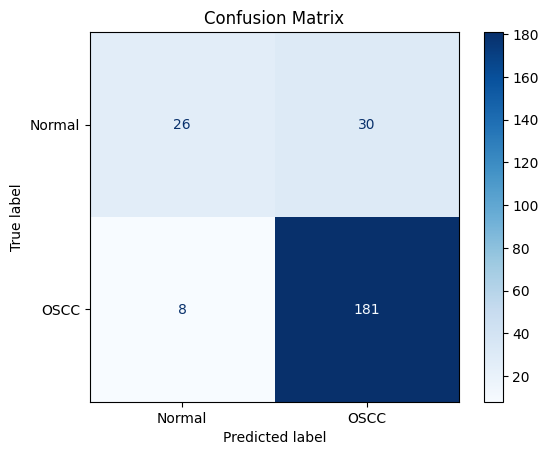

In [11]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "OSCC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Evaluation Matrics

In [12]:
# Calculate metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Metrics:
Accuracy: 0.8449
Precision: 0.8578
Recall: 0.9577
F1 Score: 0.9050


Classification Report

In [13]:
# Optional: Classification report for detailed metrics

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "OSCC"]))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.76      0.46      0.58        56
        OSCC       0.86      0.96      0.91       189

    accuracy                           0.84       245
   macro avg       0.81      0.71      0.74       245
weighted avg       0.84      0.84      0.83       245



2. NASNetMobile

In [14]:
# NASNetMobile
print("\nTraining with NASNetMobile...\n")

# Ensure the input size is set to 224x224
nasnet_mobile_model = build_model(NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
nasnet_mobile_history = nasnet_mobile_model.fit(train_datagen, validation_data=(x_test, y_test), epochs=15)


Training with NASNetMobile...

Epoch 1/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 226ms/step - accuracy: 0.7216 - loss: 0.6168 - val_accuracy: 0.7592 - val_loss: 0.5076
Epoch 2/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.7133 - loss: 0.5844 - val_accuracy: 0.7714 - val_loss: 0.4842
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.7482 - loss: 0.5430 - val_accuracy: 0.7837 - val_loss: 0.4740
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.7638 - loss: 0.5061 - val_accuracy: 0.8122 - val_loss: 0.4664
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.7608 - loss: 0.5242 - val_accuracy: 0.7878 - val_loss: 0.4718
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.7790 - loss: 0.4748 - val_accuracy: 0.8122 - val_loss: 0.4564
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.7996 - loss: 0.4605 - val_accuracy: 0.8163 - val_loss: 0.4505
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 

Model Prediction

In [15]:
# Get model predictions
y_pred_prob = nasnet_mobile_model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 643ms/step


Confusion Matrics

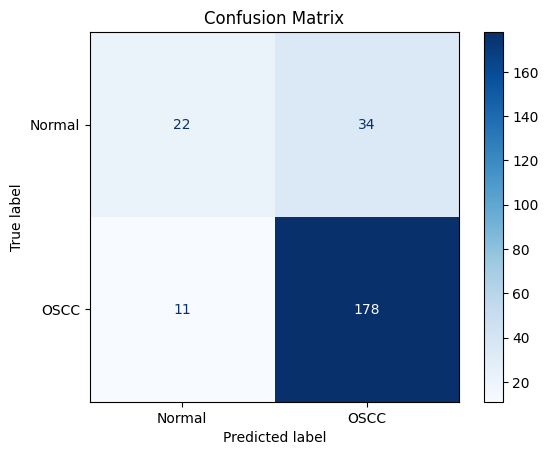

In [16]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "OSCC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Evaluation Matrics

In [17]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Metrics:
Accuracy: 0.8163
Precision: 0.8396
Recall: 0.9418
F1 Score: 0.8878


Classification Report

In [18]:
# Optional: Classification report for detailed metrics

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "OSCC"]))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.67      0.39      0.49        56
        OSCC       0.84      0.94      0.89       189

    accuracy                           0.82       245
   macro avg       0.75      0.67      0.69       245
weighted avg       0.80      0.82      0.80       245



3. NASNetLarge

In [19]:
# NASNetLarge

print("\nTraining with NASNetLarge...\n")
nasnet_large_model = build_model(NASNetLarge(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
nasnet_large_history = nasnet_large_model.fit(train_datagen, validation_data=(x_test, y_test), epochs=15)


Training with NASNetLarge...

Epoch 1/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.7049 - loss: 0.6209 - val_accuracy: 0.7878 - val_loss: 0.5117
Epoch 2/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.7710 - loss: 0.5112 - val_accuracy: 0.7918 - val_loss: 0.4809
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7864 - loss: 0.4629 - val_accuracy: 0.7959 - val_loss: 0.4598
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7906 - loss: 0.4509 - val_accuracy: 0.8122 - val_loss: 0.4372
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8301 - loss: 0.4023 - val_accuracy: 0.8122 - val_loss: 0.4368
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7969 - loss: 0.4365 - val_accuracy: 0.8163 - val_loss: 0.4266
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.8102 - loss: 0.4195 - val_accuracy: 0.8082 - val_loss: 0.4234
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.8198 - loss: 0.3908 - v

Model Prediction

In [20]:
# Get model predictions
y_pred_prob = nasnet_large_model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step


Confusion Matrics

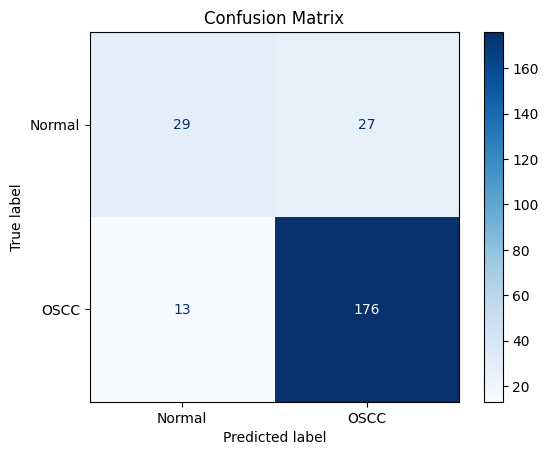

In [21]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "OSCC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Evaluation Matrics

In [22]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Metrics:
Accuracy: 0.8367
Precision: 0.8670
Recall: 0.9312
F1 Score: 0.8980


Claassification Report

In [23]:
# Optional: Classification report for detailed metrics

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "OSCC"]))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.69      0.52      0.59        56
        OSCC       0.87      0.93      0.90       189

    accuracy                           0.84       245
   macro avg       0.78      0.72      0.74       245
weighted avg       0.83      0.84      0.83       245



4. Xception

In [24]:
# Xception

print("\nTraining with Xception...\n")
xception_model = build_model(Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
xception_large_history = xception_model.fit(train_datagen, validation_data=(x_test, y_test), epochs=15)


Training with Xception...

Epoch 1/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 440ms/step - accuracy: 0.7052 - loss: 0.6131 - val_accuracy: 0.7837 - val_loss: 0.5042
Epoch 2/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 424ms/step - accuracy: 0.7698 - loss: 0.5184 - val_accuracy: 0.7755 - val_loss: 0.4716
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 423ms/step - accuracy: 0.7631 - loss: 0.4794 - val_accuracy: 0.7878 - val_loss: 0.4494
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 424ms/step - accuracy: 0.7806 - loss: 0.4748 - val_accuracy: 0.8122 - val_loss: 0.4297
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 423ms/step - accuracy: 0.7952 - loss: 0.4566 - val_accuracy: 0.8122 - val_loss: 0.4180
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 27s 429ms/step - accuracy: 0.8050 - loss: 0.4517 - val_accuracy: 0.8122 - val_loss: 0.4099
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 462ms/step - accuracy: 0.8105 - loss: 0.4160 - val_accuracy: 0.7959 - val_loss: 0.4091
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 461ms/step - accuracy: 0.80

Model Prediction

In [25]:
# Get model predictions
y_pred_prob = xception_model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 822ms/step


Confusion Matrics

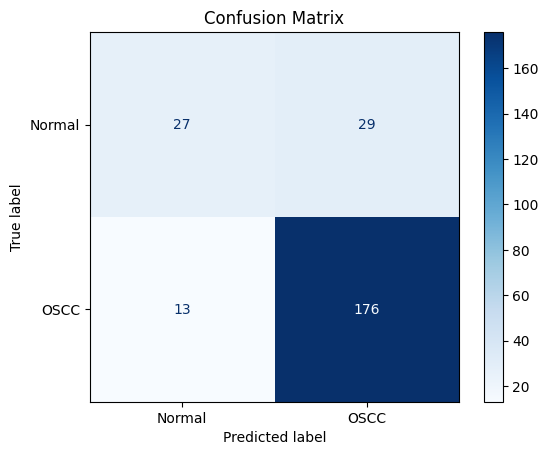

In [26]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "OSCC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Evaluation Matrics

In [27]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Metrics:
Accuracy: 0.8286
Precision: 0.8585
Recall: 0.9312
F1 Score: 0.8934


Classification Report

In [28]:
# Optional: Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "OSCC"]))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.68      0.48      0.56        56
        OSCC       0.86      0.93      0.89       189

    accuracy                           0.83       245
   macro avg       0.77      0.71      0.73       245
weighted avg       0.82      0.83      0.82       245



5. DenseNet121

In [29]:
# DenseNet121

print("\nTraining with DenseNet121...\n")
denseNet121_model = build_model(DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
denseNet121_history = denseNet121_model.fit(train_datagen, validation_data=(x_test, y_test), epochs=15)


Training with DenseNet121...

Epoch 1/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 34s 455ms/step - accuracy: 0.6662 - loss: 0.7322 - val_accuracy: 0.7510 - val_loss: 0.5163
Epoch 2/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 401ms/step - accuracy: 0.7321 - loss: 0.5754 - val_accuracy: 0.7633 - val_loss: 0.4778
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 408ms/step - accuracy: 0.7590 - loss: 0.5485 - val_accuracy: 0.7878 - val_loss: 0.4611
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 408ms/step - accuracy: 0.7544 - loss: 0.5180 - val_accuracy: 0.7918 - val_loss: 0.4458
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 408ms/step - accuracy: 0.7590 - loss: 0.5315 - val_accuracy: 0.8122 - val_loss: 0.4419
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 404ms/step - accuracy: 0.7952 - loss: 0.4739 - val_accuracy: 0.8163 - val_loss: 0.4277
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 403ms/step - accuracy: 0.7614 - loss: 0.5021 - val_accuracy: 0.8000 - val_loss: 0.4217
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 408ms/step - accuracy: 0

Model Prediction

In [30]:
# Get model predictions
y_pred_prob = denseNet121_model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 934ms/step


Confusion Matrics

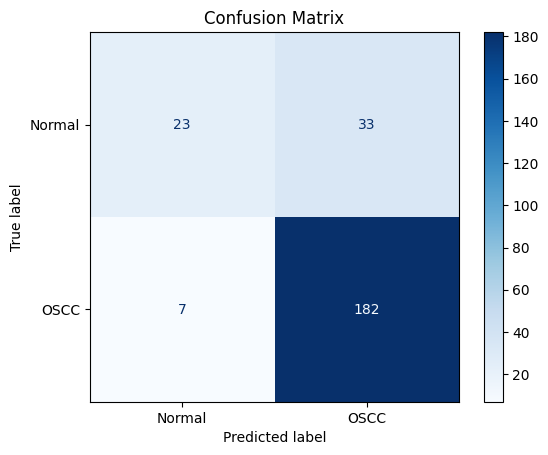

In [31]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "OSCC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Evaluation Matrics

In [32]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Metrics:
Accuracy: 0.8367
Precision: 0.8465
Recall: 0.9630
F1 Score: 0.9010


Classification Report

In [33]:
# Optional: Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "OSCC"]))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.77      0.41      0.53        56
        OSCC       0.85      0.96      0.90       189

    accuracy                           0.84       245
   macro avg       0.81      0.69      0.72       245
weighted avg       0.83      0.84      0.82       245



6. DenseNet169

In [34]:
# DenseNet169

print("\nTraining with DenseNet169...\n")
denseNet169_model = build_model(DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
denseNet169_history = denseNet169_model.fit(train_datagen, validation_data=(x_test, y_test), epochs=15)


Training with DenseNet169...

Epoch 1/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 531ms/step - accuracy: 0.6770 - loss: 0.6905 - val_accuracy: 0.7837 - val_loss: 0.5078
Epoch 2/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 461ms/step - accuracy: 0.7498 - loss: 0.5603 - val_accuracy: 0.7837 - val_loss: 0.4969
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 28s 452ms/step - accuracy: 0.7569 - loss: 0.4898 - val_accuracy: 0.8163 - val_loss: 0.4466
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 27s 439ms/step - accuracy: 0.7806 - loss: 0.4761 - val_accuracy: 0.8041 - val_loss: 0.4469
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 27s 436ms/step - accuracy: 0.7706 - loss: 0.4709 - val_accuracy: 0.8082 - val_loss: 0.4191
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 28s 446ms/step - accuracy: 0.8018 - loss: 0.4595 - val_accuracy: 0.8041 - val_loss: 0.4098
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 28s 455ms/step - accuracy: 0.7712 - loss: 0.4633 - val_accuracy: 0.8082 - val_loss: 0.4067
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 467ms/step - accuracy: 0

Model Prediction

In [35]:
# Get model predictions
y_pred_prob = denseNet169_model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step  


Confussion Matrics

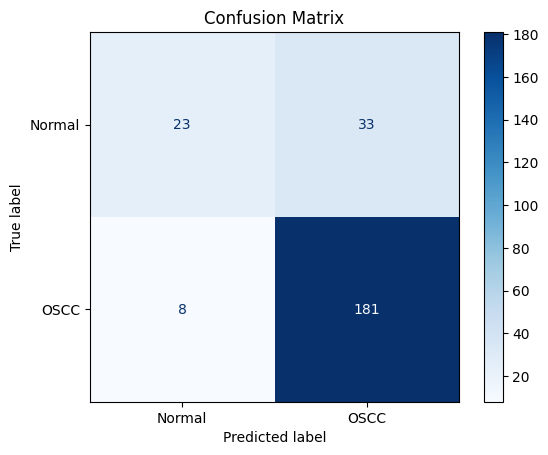

In [36]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "OSCC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Evaluation Matrics

In [37]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Metrics:
Accuracy: 0.8327
Precision: 0.8458
Recall: 0.9577
F1 Score: 0.8983


Classification Report

In [38]:
# Optional: Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "OSCC"]))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.74      0.41      0.53        56
        OSCC       0.85      0.96      0.90       189

    accuracy                           0.83       245
   macro avg       0.79      0.68      0.71       245
weighted avg       0.82      0.83      0.81       245



7. DenseNet201

In [39]:
# DenseNet201

print("\nTraining with DenseNet201...\n")
denseNet201_model = build_model(DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
denseNet201_history = denseNet201_model.fit(train_datagen, validation_data=(x_test, y_test), epochs=15)


Training with DenseNet201...

Epoch 1/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 43s 556ms/step - accuracy: 0.6851 - loss: 0.6962 - val_accuracy: 0.7837 - val_loss: 0.4848
Epoch 2/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 32s 512ms/step - accuracy: 0.7751 - loss: 0.5107 - val_accuracy: 0.7918 - val_loss: 0.4409
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 31s 505ms/step - accuracy: 0.7693 - loss: 0.5356 - val_accuracy: 0.8082 - val_loss: 0.4484
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 30s 487ms/step - accuracy: 0.7630 - loss: 0.4982 - val_accuracy: 0.8245 - val_loss: 0.4148
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 31s 504ms/step - accuracy: 0.7846 - loss: 0.4536 - val_accuracy: 0.8163 - val_loss: 0.4061
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 31s 495ms/step - accuracy: 0.7995 - loss: 0.4483 - val_accuracy: 0.8286 - val_loss: 0.3918
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 32s 516ms/step - accuracy: 0.8145 - loss: 0.4282 - val_accuracy: 0.8245 - val_loss: 0.3846
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 32s 515ms/step - accuracy: 0

Model Prediction

In [40]:
# Get model predictions
y_pred_prob = denseNet201_model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step 


Confussion Matrics

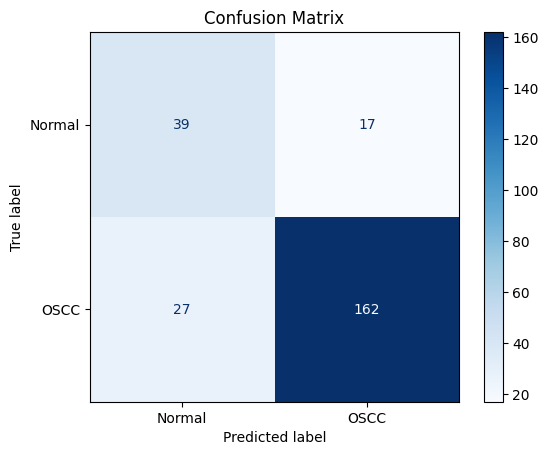

In [41]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "OSCC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Evaluation Matrics

In [42]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Metrics:
Accuracy: 0.8204
Precision: 0.9050
Recall: 0.8571
F1 Score: 0.8804


Claasification Report

In [43]:
# Optional: Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "OSCC"]))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.59      0.70      0.64        56
        OSCC       0.91      0.86      0.88       189

    accuracy                           0.82       245
   macro avg       0.75      0.78      0.76       245
weighted avg       0.83      0.82      0.83       245



8. InceptionV3

In [44]:
# InceptionV3

print("\nTraining with InceptionV3...\n")
inceptionV3_model = build_model(InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
inceptionV3_history = inceptionV3_model.fit(train_datagen, validation_data=(x_test, y_test), epochs=15)


Training with InceptionV3...

Epoch 1/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 0.6724 - loss: 0.7228 - val_accuracy: 0.7673 - val_loss: 0.4855
Epoch 2/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.7437 - loss: 0.5505 - val_accuracy: 0.7918 - val_loss: 0.4326
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.7478 - loss: 0.5308 - val_accuracy: 0.7837 - val_loss: 0.4147
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.7531 - loss: 0.5156 - val_accuracy: 0.8000 - val_loss: 0.4013
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.7838 - loss: 0.4782 - val_accuracy: 0.8082 - val_loss: 0.3892
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.7688 - loss: 0.4795 - val_accuracy: 0.8204 - val_loss: 0.3839
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.7657 - loss: 0.5000 - val_accuracy: 0.8122 - val_loss: 0.3872
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0

Model Prediction

In [45]:
# Get model predictions
y_pred_prob = inceptionV3_model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 424ms/step


Confussion Matrics

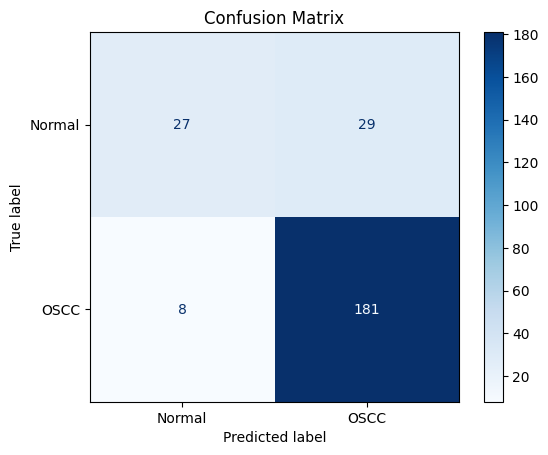

In [46]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "OSCC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Evaluation Matrics

In [47]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Metrics:
Accuracy: 0.8490
Precision: 0.8619
Recall: 0.9577
F1 Score: 0.9073


Classification Matrics

In [48]:
# Optional: Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "OSCC"]))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.77      0.48      0.59        56
        OSCC       0.86      0.96      0.91       189

    accuracy                           0.85       245
   macro avg       0.82      0.72      0.75       245
weighted avg       0.84      0.85      0.84       245

